In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('/content/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding = 'cp1252')

In [ ]:
print(df.head)

<bound method NDFrame.head of       Area Code         Area  Months Code               Months  Element Code  \
0             2  Afghanistan         7001              January          7271   
1             2  Afghanistan         7001              January          6078   
2             2  Afghanistan         7002             February          7271   
3             2  Afghanistan         7002             February          6078   
4             2  Afghanistan         7003                March          7271   
...         ...          ...          ...                  ...           ...   
9651       5873         OECD         7018      Junâ€“Julâ€“Aug          6078   
9652       5873         OECD         7019      Sepâ€“Octâ€“Nov          7271   
9653       5873         OECD         7019      Sepâ€“Octâ€“Nov          6078   
9654       5873         OECD         7020  Meteorological year          7271   
9655       5873         OECD         7020  Meteorological year          6078   

         

In [ ]:
print(df.info)

<bound method DataFrame.info of       Area Code         Area  Months Code               Months  Element Code  \
0             2  Afghanistan         7001              January          7271   
1             2  Afghanistan         7001              January          6078   
2             2  Afghanistan         7002             February          7271   
3             2  Afghanistan         7002             February          6078   
4             2  Afghanistan         7003                March          7271   
...         ...          ...          ...                  ...           ...   
9651       5873         OECD         7018      Junâ€“Julâ€“Aug          6078   
9652       5873         OECD         7019      Sepâ€“Octâ€“Nov          7271   
9653       5873         OECD         7019      Sepâ€“Octâ€“Nov          6078   
9654       5873         OECD         7020  Meteorological year          7271   
9655       5873         OECD         7020  Meteorological year          6078   

       

In [ ]:
target_columns = ['Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']
target = df[target_columns].mean(axis=1)
df['std_dev'] = df[target_columns].std(axis=1)
df['mean_temp_change_target'] = target

In [ ]:
print(df[['mean_temp_change_target']])

      mean_temp_change_target
0                     1.06725
1                     1.95000
2                     0.72805
3                     2.59700
4                     1.42075
...                       ...
9651                  0.24700
9652                  0.99740
9653                  0.37800
9654                  1.05410
9655                  0.26000

[9656 rows x 1 columns]


In [ ]:
df = df[['Area', 'Element', 'Unit'] + list(df.columns[8:66]) + ['mean_temp_change_target']]
print("Missing values before preprocessing:")
print(df.isnull().sum())
df = df.fillna(df.mean())
features = df.iloc[:, 3:65]  # Columns from 'Y1961' to 'Y2019'
target = df['mean_temp_change_target']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(data=features_scaled, columns=features.columns)
df_scaled['mean_temp_change_target'] = target
print("\nMissing values after preprocessing:")
print(df_scaled.isnull().sum())
print("\nPreprocessed DataFrame:")
print(df_scaled.head())

Missing values before preprocessing:
Area                          0
Element                       0
Unit                          0
Y1962                      1334
Y1963                      1362
                           ... 
Y2016                      1308
Y2017                      1290
Y2018                      1307
Y2019                      1291
mean_temp_change_target    1054
Length: 62, dtype: int64

Missing values after preprocessing:
Y1962                      0
Y1963                      0
Y1964                      0
Y1965                      0
Y1966                      0
Y1967                      0
Y1968                      0
Y1969                      0
Y1970                      0
Y1971                      0
Y1972                      0
Y1973                      0
Y1974                      0
Y1975                      0
Y1976                      0
Y1977                      0
Y1978                      0
Y1979                      0
Y1980                      

<ipython-input-40-428676f1b976>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


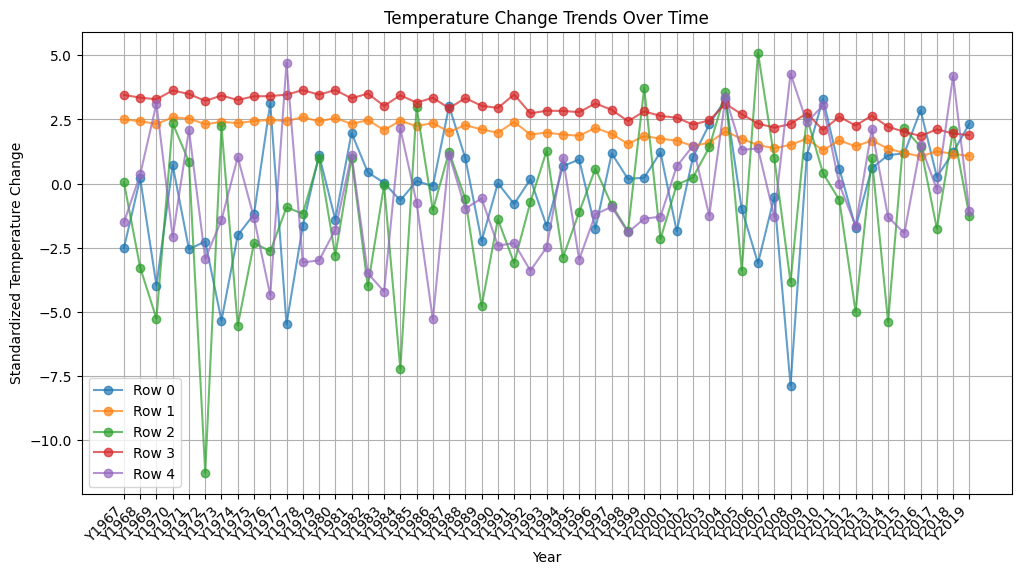

In [ ]:
years = [f'Y{i}' for i in range(1967, 2020)]
temperature_changes = df_scaled[years]
plt.figure(figsize=(12, 6))

for idx, row in df_scaled.iloc[:5].iterrows():
    plt.plot(years, row[years], marker='o', label=f'Row {idx}', alpha=0.7)

plt.title('Temperature Change Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Standardized Temperature Change')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
target_columns = ['Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']
target = df[target_columns].mean(axis=1)
df['std_dev'] = df.iloc[:, 3:65].std(axis=1)
df['mean_temp_change_target'] = target
df = df[['Area', 'Element', 'Unit', 'std_dev'] + list(df.columns[8:66]) + ['mean_temp_change_target']]
print("Missing values before preprocessing:")
print(df.isnull().sum())
df = df.fillna(df.mean())
features = df.iloc[:, 3:65] 
target = df['mean_temp_change_target']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(data=features_scaled, columns=features.columns)
df_scaled['mean_temp_change_target'] = target
print("\nMissing values after preprocessing:")
print(df_scaled.isnull().sum())
print("\nPreprocessed DataFrame:")
print(df_scaled.head())
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Missing values before preprocessing:
Area                       0
Element                    0
Unit                       0
std_dev                    0
Y1967                      0
Y1968                      0
Y1969                      0
Y1970                      0
Y1971                      0
Y1972                      0
Y1973                      0
Y1974                      0
Y1975                      0
Y1976                      0
Y1977                      0
Y1978                      0
Y1979                      0
Y1980                      0
Y1981                      0
Y1982                      0
Y1983                      0
Y1984                      0
Y1985                      0
Y1986                      0
Y1987                      0
Y1988                      0
Y1989                      0
Y1990                      0
Y1991                      0
Y1992                      0
Y1993                      0
Y1994                      0
Y1995                      0
Y1996 

<ipython-input-42-299f715a65c9>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
features = df_scaled.iloc[:, :-1]
target = df_scaled['mean_temp_change_target']
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(model, features, target, cv=kf, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean R-squared Score:", np.mean(cv_r2_scores))

Cross-Validation R-squared Scores: [1. 1. 1. 1. 1.]
Mean R-squared Score: 1.0


Data Overview:
   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change  Â°C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation  Â°C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change  Â°C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation  Â°C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change  Â°C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  
1  1.950  1.950  1.

<ipython-input-56-b481e4465b3f>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                            Area Code   Months Code  Element Code     Y1961  \
Area Code                1.000000e+00 -1.187969e-12 -3.586167e-18 -0.045246   
Months Code             -1.187969e-12  1.000000e+00 -6.341840e-17 -0.114063   
Element Code            -3.586167e-18 -6.341840e-17  1.000000e+00 -0.368447   
Y1961                   -4.524586e-02 -1.140632e-01 -3.684470e-01  1.000000   
Y1962                   -3.911497e-02 -8.064268e-02 -4.826835e-01  0.365568   
...                               ...           ...           ...       ...   
Y2017                   -2.835256e-02 -7.305457e-02  3.932930e-01  0.160552   
Y2018                   -5.366064e-02 -6.922650e-02  3.730504e-01  0.013101   
Y2019                   -4.874726e-02 -6.719156e-02  4.739778e-01  0.145801   
std_dev                 -6.459276e-02 -1.237876e-01  7.654916e-01 -0.166400   
mean_temp_change_target -5.432491e-02 -1.363811e-01  3.708793e-01  0.272881   

                            Y1962     Y1963     Y19

<ipython-input-56-b481e4465b3f>:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1, linewidths=.5)


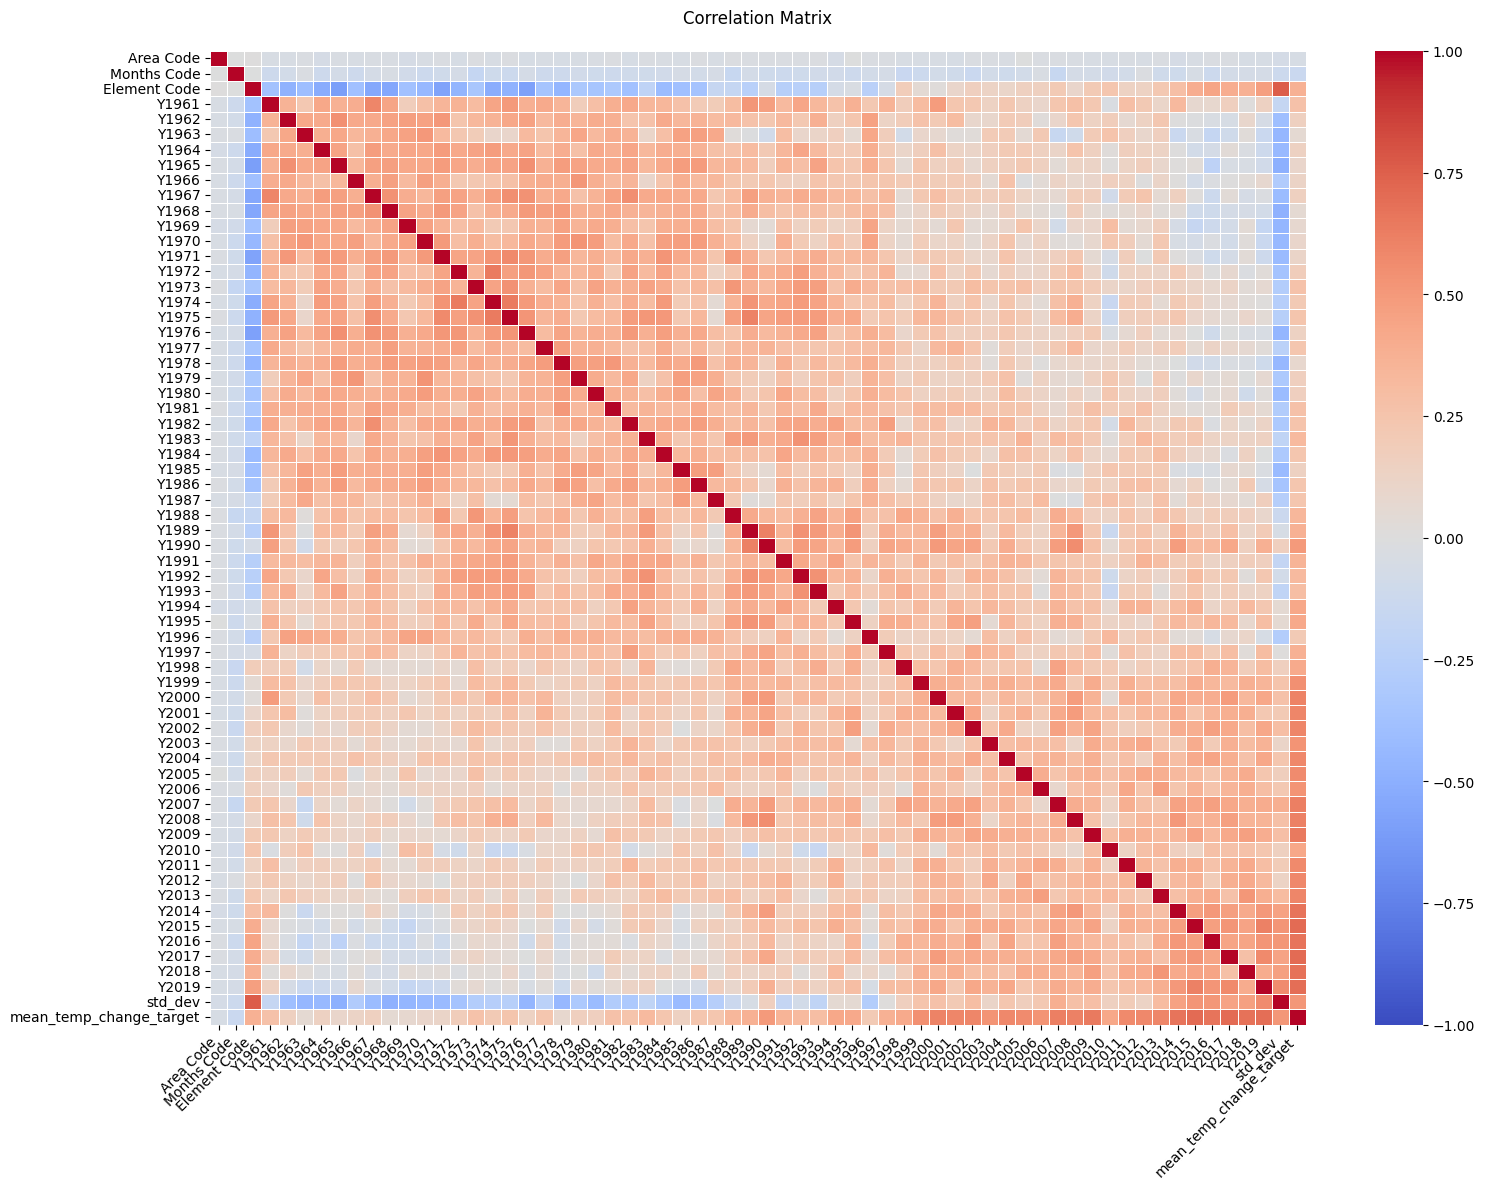

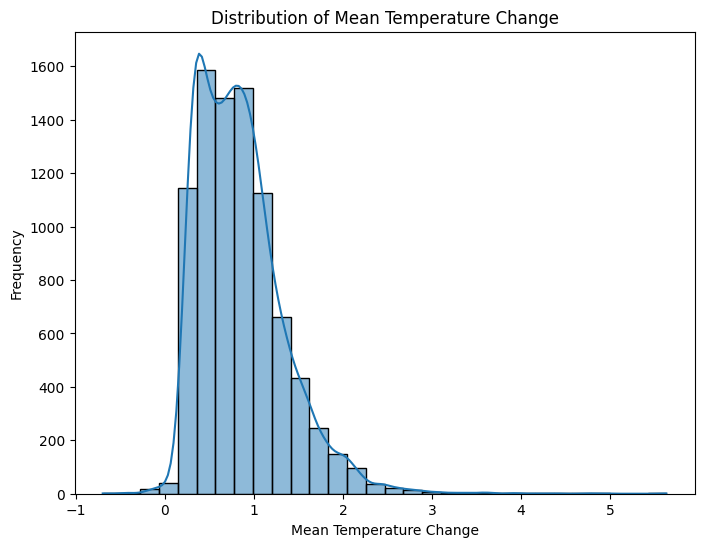

In [ ]:
print("\nStatistical Summary:")
print(df.describe())
print("\nCorrelation Matrix:")
print(df.corr())
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1, linewidths=.5)
heatmap.set_title('Correlation Matrix', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['mean_temp_change_target'], bins=30, kde=True)
plt.title("Distribution of Mean Temperature Change")
plt.xlabel("Mean Temperature Change")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("\nMissing values after preprocessing:")
print(df_scaled.isnull().sum())
print("\nPreprocessed DataFrame:")
print(df_scaled.head())

Missing values before preprocessing:
Area                          0
Element                       0
Unit                          0
Y2000                      1314
Y2001                      1415
Y2002                      1344
Y2003                      1266
Y2004                      1241
Y2005                      1232
Y2006                      1153
Y2007                      1122
Y2008                      1181
Y2009                      1237
Y2010                      1221
Y2011                      1219
Y2012                      1306
Y2013                      1229
Y2014                      1279
Y2015                      1295
Y2016                      1308
Y2017                      1290
Y2018                      1307
Y2019                      1291
std_dev                     663
mean_temp_change_target    1054
dtype: int64

Missing values after preprocessing:
Y2000                      0
Y2001                      0
Y2002                      0
Y2003                     

<ipython-input-45-a84c94a01eee>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Mean Absolute Error: 0.015452453012823246
Mean Squared Error: 0.002640945357836398
R-squared: 0.9885233409873221


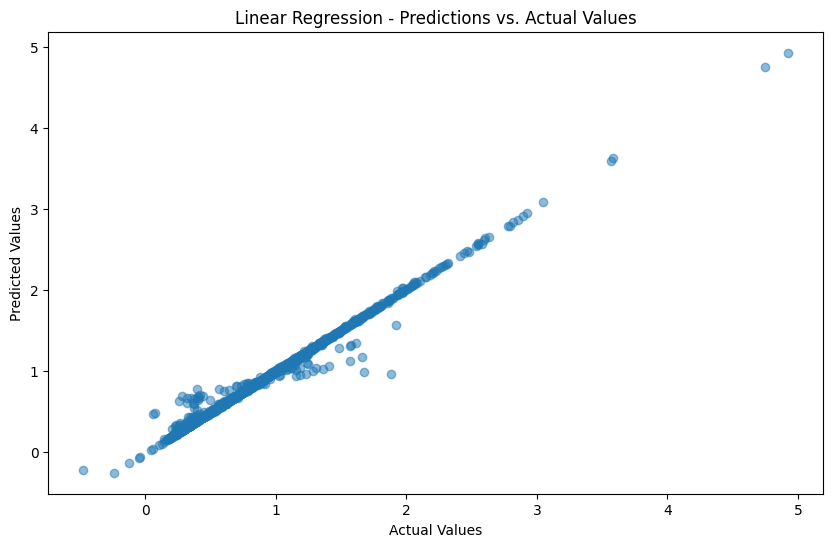

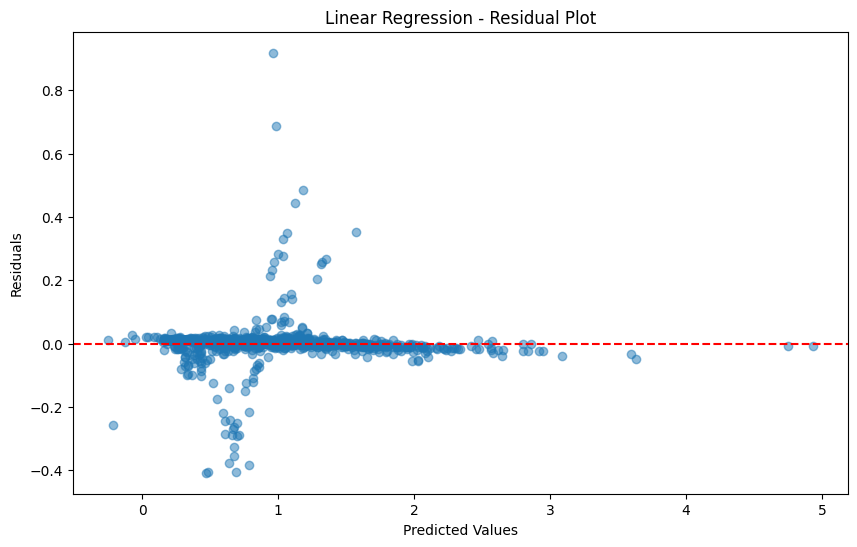

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Predictions vs. Actual Values')
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression - Residual Plot')
plt.show()

Random Forest Regressor:
Mean Absolute Error: 0.03816642921945932
Mean Squared Error: 0.009593850655155426
R-squared: 0.9583083564144699


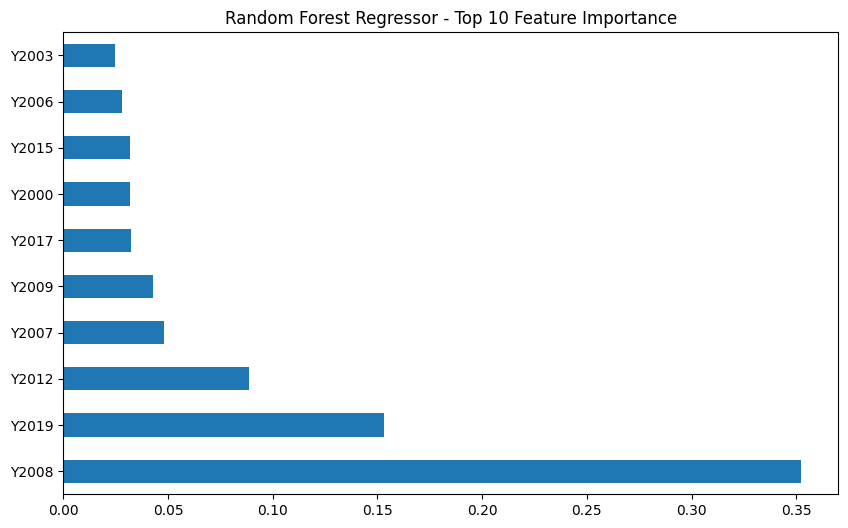

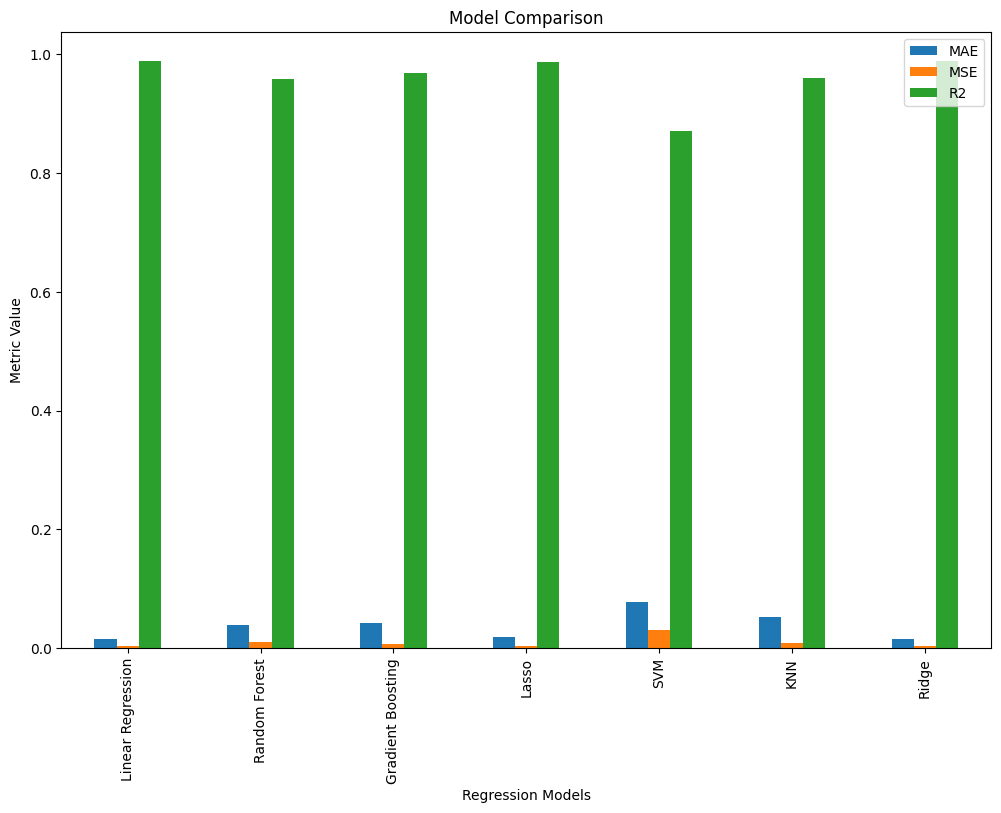


Gradient Boosting Regressor:
Mean Absolute Error: 0.04126079801834943
Mean Squared Error: 0.007189237421002843
R-squared: 0.968757995618043


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest Regressor:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Random Forest Regressor - Top 10 Feature Importance')
plt.show()

# Model Comparison 
metrics = {'MAE': [mae, rf_mae, gb_mae, lasso_mae, svm_mae, knn_mae, ridge_mae],
           'MSE': [mse, rf_mse, gb_mse, lasso_mse, svm_mse, knn_mse, ridge_mse],
           'R2': [r2, rf_r2, gb_r2, lasso_r2, svm_r2, knn_r2, ridge_r2]}

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Lasso', 'SVM', 'KNN', 'Ridge']
metrics_df = pd.DataFrame(metrics, index=model_names)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.xlabel('Regression Models')
plt.show()
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("\nGradient Boosting Regressor:")
print(f"Mean Absolute Error: {gb_mae}")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")


<ipython-input-49-e276d8ec765f>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


Lasso Regression:
Mean Absolute Error: 0.01802961484371306
Mean Squared Error: 0.0029491466661830685
R-squared: 0.9871840019083592


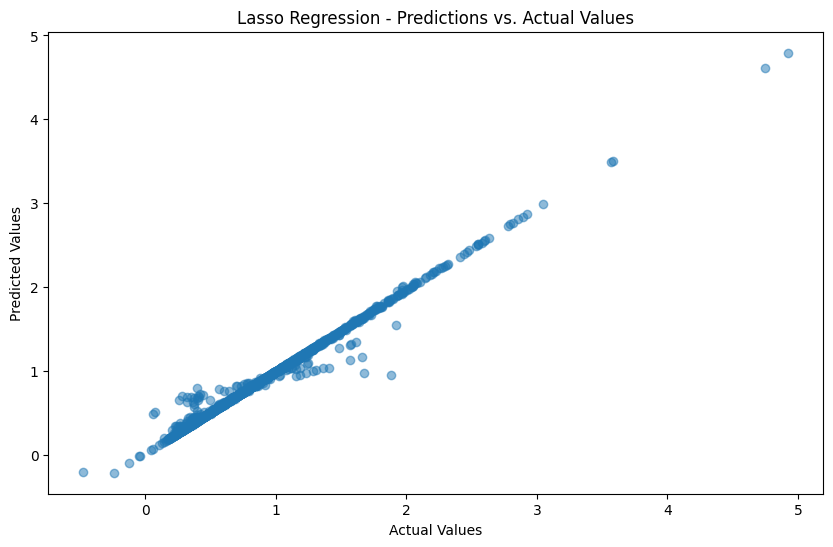

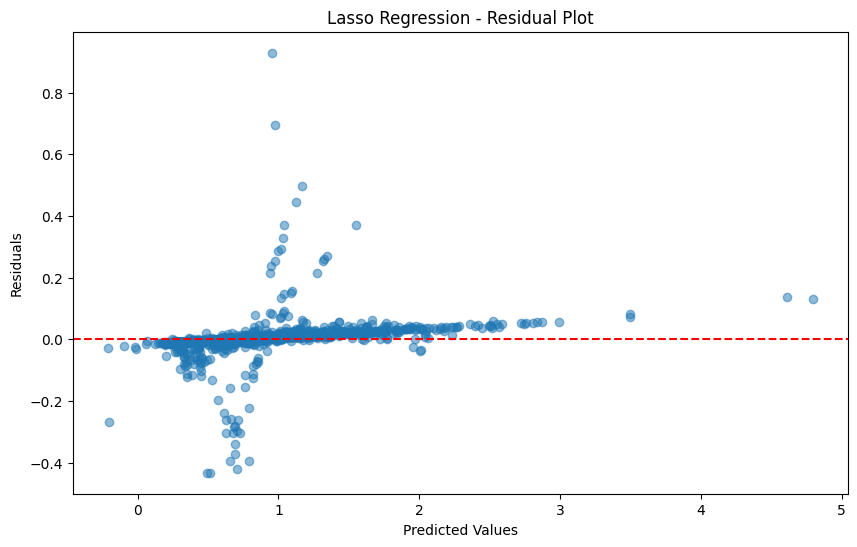

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso

numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)
lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_model.predict(X_test_scaled)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
print("Lasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R-squared: {lasso_r2}")
lasso_y_pred = lasso_model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - Predictions vs. Actual Values')
plt.show()
lasso_residuals = y_test - lasso_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(lasso_y_pred, lasso_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Lasso Regression - Residual Plot')
plt.show()

Support Vector Machine (SVM) Regressor:
Mean Absolute Error: 0.07755099620375516
Mean Squared Error: 0.029575226662960388
R-squared: 0.8714760263303852


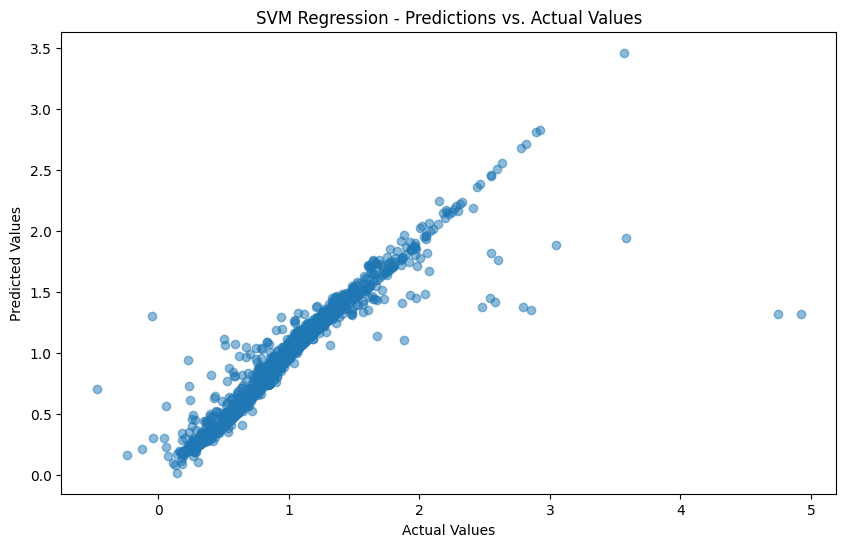

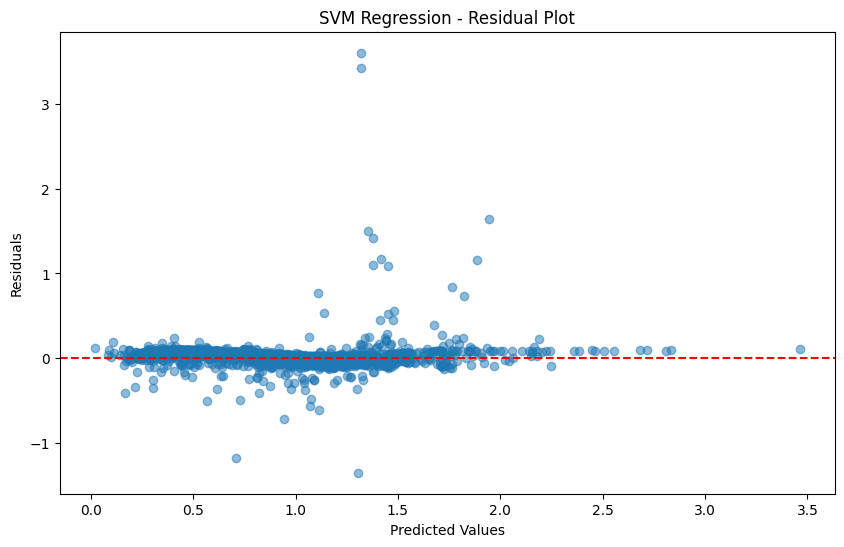


K-Nearest Neighbors (KNN) Regressor:
Mean Absolute Error: 0.05149137016875454
Mean Squared Error: 0.009118932038356502
R-squared: 0.9603721927629202


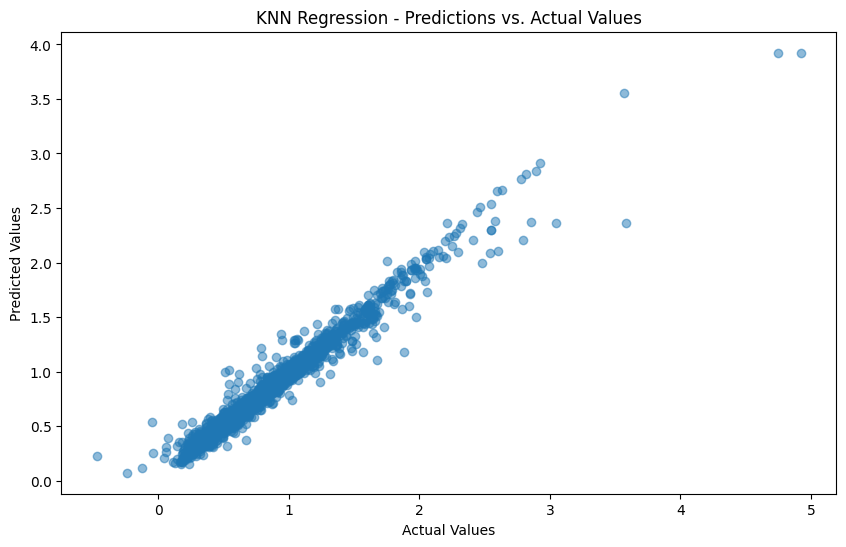

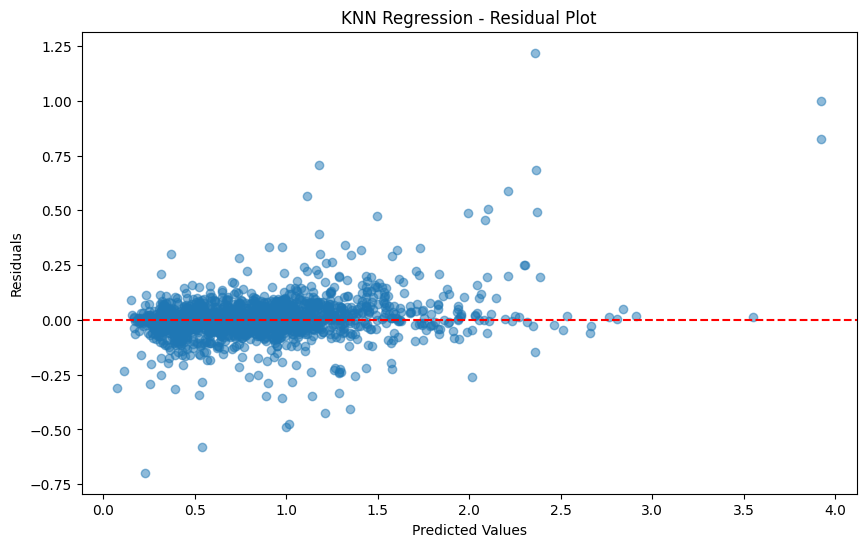

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)
print("Support Vector Machine (SVM) Regressor:")
print(f"Mean Absolute Error: {svm_mae}")
print(f"Mean Squared Error: {svm_mse}")
print(f"R-squared: {svm_r2}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression - Predictions vs. Actual Values')
plt.show()
svm_residuals = y_test - svm_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(svm_y_pred, svm_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('SVM Regression - Residual Plot')
plt.show()
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
knn_y_pred = knn_model.predict(X_test_scaled)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
print("\nK-Nearest Neighbors (KNN) Regressor:")
print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression - Predictions vs. Actual Values')
plt.show()
knn_residuals = y_test - knn_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(knn_y_pred, knn_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN Regression - Residual Plot')
plt.show()

Ridge Regression:
Mean Absolute Error: 0.015448611453588848
Mean Squared Error: 0.002640895549527938
R-squared: 0.9885235574374545


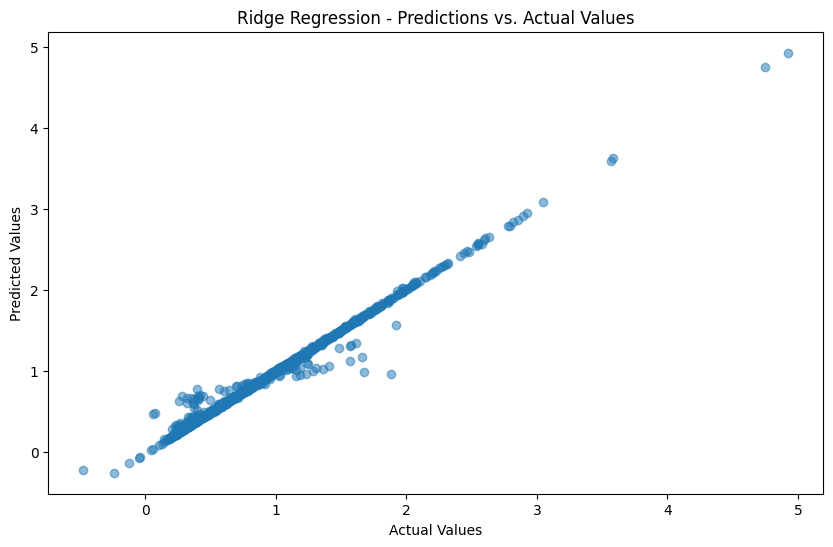

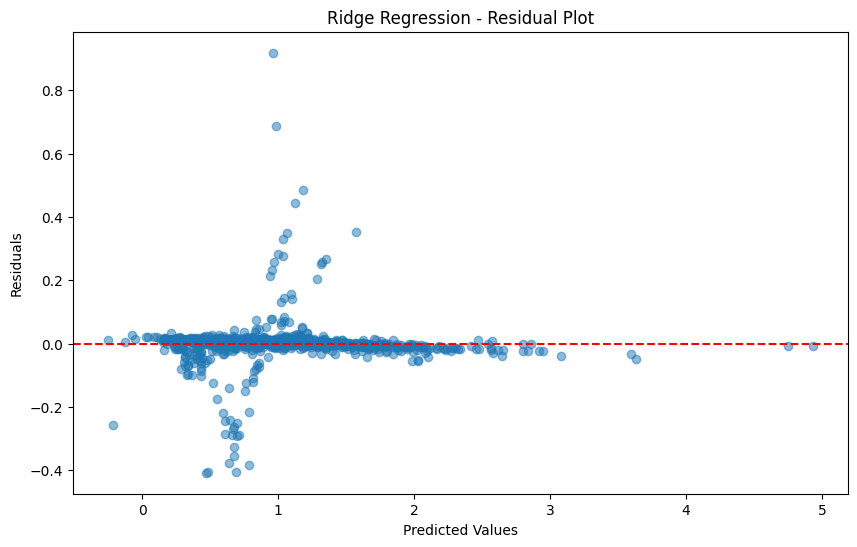

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
print("Ridge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared: {ridge_r2}")
ridge_y_pred = ridge_model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression - Predictions vs. Actual Values')
plt.show()
ridge_residuals = y_test - ridge_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(ridge_y_pred, ridge_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression - Residual Plot')
plt.show()

Decision Tree Regressor:
Mean Absolute Error: 0.07292589484749501
Mean Squared Error: 0.032663762099148
R-squared: 0.8580542915926636


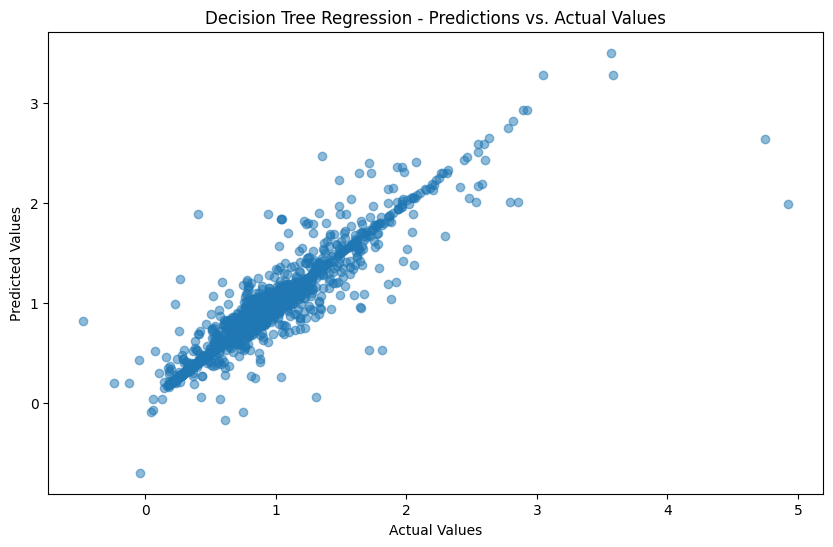

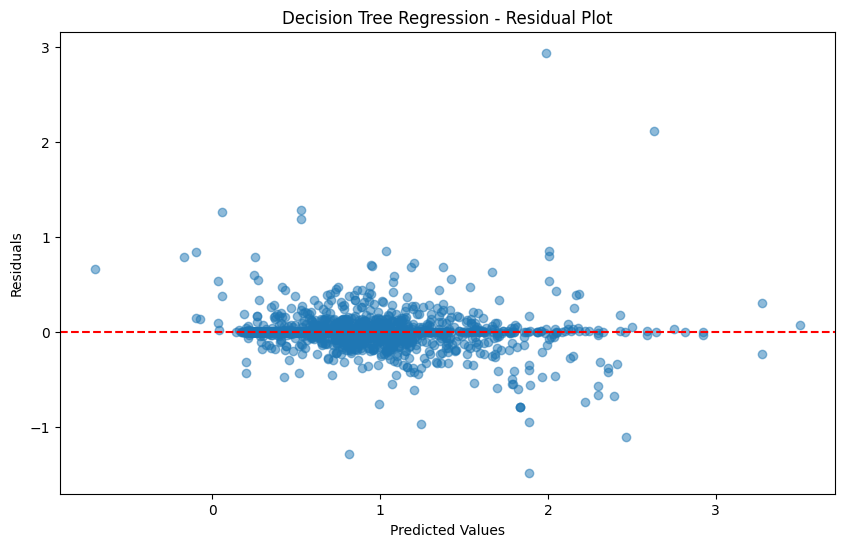

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print("Decision Tree Regressor:")
print(f"Mean Absolute Error: {dt_mae}")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")
dt_y_pred = dt_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression - Predictions vs. Actual Values')
plt.show()
dt_residuals = y_test - dt_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(dt_y_pred, dt_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree Regression - Residual Plot')
plt.show()

In [ ]:
from sklearn.utils import resample

num_bootstrap_samples = 100
mse_scores = []
r2_scores = []
for _ in range(num_bootstrap_samples):
    features_sample, target_sample = resample(features, target, random_state=42)
    model = LinearRegression()
    model.fit(features_sample, target_sample)
    y_pred = model.predict(features)
    mse_scores.append(mean_squared_error(target, y_pred))
    r2_scores.append(r2_score(target, y_pred))

print("Bootstrap Stability Metrics:")
print(f"Mean MSE across bootstrap samples: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE across bootstrap samples: {np.std(mse_scores)}")
print(f"Mean R-squared across bootstrap samples: {np.mean(r2_scores)}")
print(f"Standard Deviation of R-squared across bootstrap samples: {np.std(r2_scores)}")

Bootstrap Stability Metrics:
Mean MSE across bootstrap samples: 0.002532159915520985
Standard Deviation of MSE across bootstrap samples: 0.0
Mean R-squared across bootstrap samples: 0.9881199233171931
Standard Deviation of R-squared across bootstrap samples: 2.220446049250313e-16


In [ ]:
num_bootstrap_samples = 100
bootstrap_mses = []
bootstrap_r2s = []
for _ in range(num_bootstrap_samples):
    df_bootstrap = resample(df_scaled, replace=True, random_state=42)
    X_bootstrap = df_bootstrap.drop(columns=['mean_temp_change_target'])
    y_bootstrap = df_bootstrap['mean_temp_change_target']
    X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
        X_bootstrap, y_bootstrap, test_size=0.2, random_state=42
    )
    model_bootstrap = LinearRegression()
    model_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_bootstrap = model_bootstrap.predict(X_test_bootstrap)
    mse_bootstrap = mean_squared_error(y_test_bootstrap, y_pred_bootstrap)
    r2_bootstrap = r2_score(y_test_bootstrap, y_pred_bootstrap)
    bootstrap_mses.append(mse_bootstrap)
    bootstrap_r2s.append(r2_bootstrap)
mean_mse_bootstrap = np.mean(bootstrap_mses)
std_dev_mse_bootstrap = np.std(bootstrap_mses)
mean_r2_bootstrap = np.mean(bootstrap_r2s)
std_dev_r2_bootstrap = np.std(bootstrap_r2s)
print("Bootstrap Stability Metrics:")
print(f"Mean MSE across bootstrap samples: {mean_mse_bootstrap}")
print(f"Standard Deviation of MSE across bootstrap samples: {std_dev_mse_bootstrap}")
print(f"Mean R-squared across bootstrap samples: {mean_r2_bootstrap}")
print(f"Standard Deviation of R-squared across bootstrap samples: {std_dev_r2_bootstrap}")

Bootstrap Stability Metrics:
Mean MSE across bootstrap samples: 0.002477239990564993
Standard Deviation of MSE across bootstrap samples: 4.336808689942018e-19
Mean R-squared across bootstrap samples: 0.9885614821215427
Standard Deviation of R-squared across bootstrap samples: 1.1102230246251565e-16


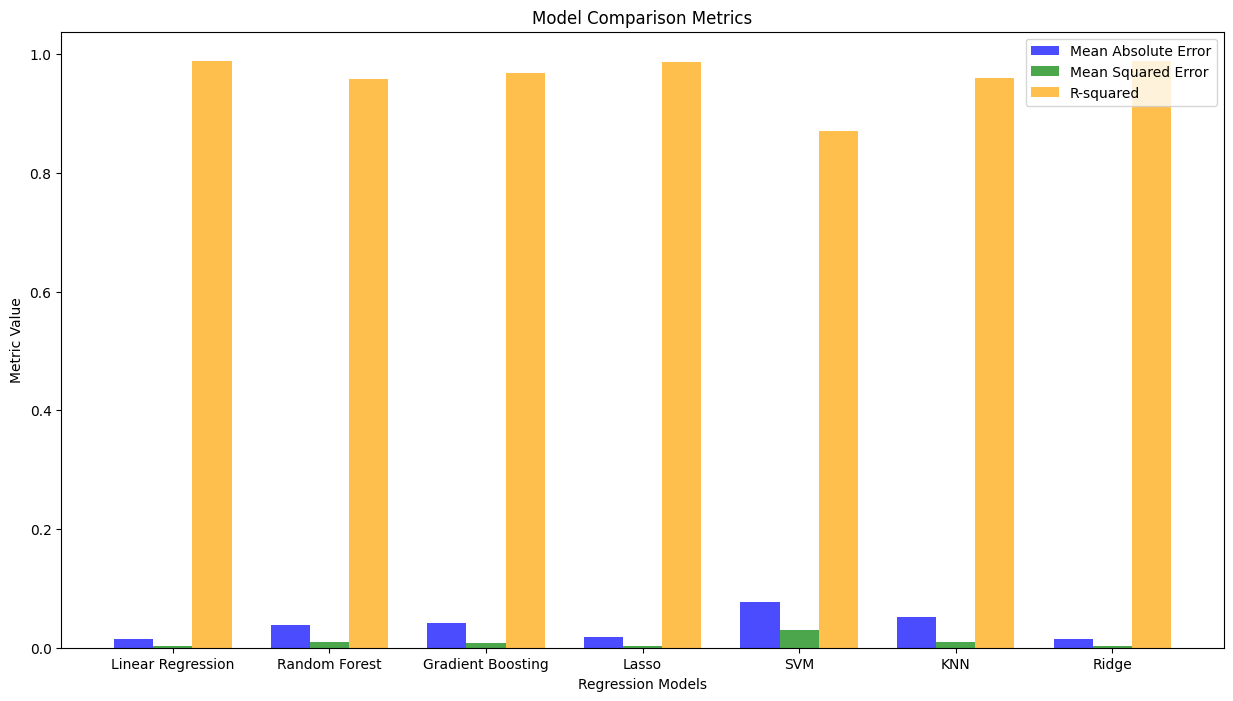

In [ ]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Lasso', 'SVM', 'KNN', 'Ridge']
mae_values = [mae, rf_mae, gb_mae, lasso_mae, svm_mae, knn_mae, ridge_mae]
mse_values = [mse, rf_mse, gb_mse, lasso_mse, svm_mse, knn_mse, ridge_mse]
r2_values = [r2, rf_r2, gb_r2, lasso_r2, svm_r2, knn_r2, ridge_r2]
bar_width = 0.25
index = np.arange(len(models))
plt.figure(figsize=(15, 8))
bar1 = plt.bar(index - bar_width, mae_values, bar_width, label='Mean Absolute Error', color='blue', alpha=0.7)
bar2 = plt.bar(index, mse_values, bar_width, label='Mean Squared Error', color='green', alpha=0.7)
bar3 = plt.bar(index + bar_width, r2_values, bar_width, label='R-squared', color='orange', alpha=0.7)
plt.title('Model Comparison Metrics')
plt.xlabel('Regression Models')
plt.ylabel('Metric Value')
plt.xticks(index, models)
plt.legend()
plt.show()


The best model is: Linear Regression


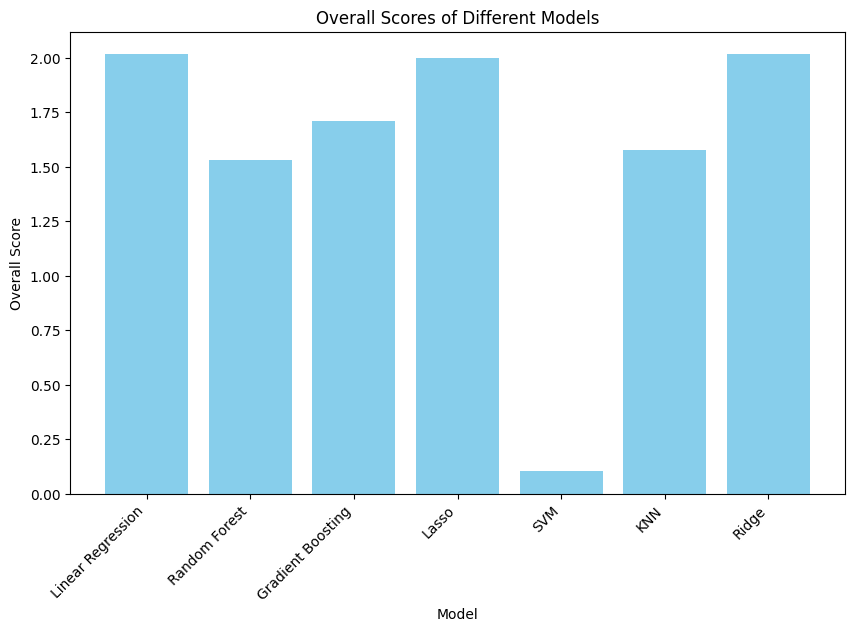

In [ ]:
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Lasso', 'SVM', 'KNN', 'Ridge']
mae_values = [mae, rf_mae, gb_mae, lasso_mae, svm_mae, knn_mae, ridge_mae]
mse_values = [mse, rf_mse, gb_mse, lasso_mse, svm_mse, knn_mse, ridge_mse]
r2_values = [r2, rf_r2, gb_r2, lasso_r2, svm_r2, knn_r2, ridge_r2]
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'R-squared': r2_values})

metrics_df['R-squared'] = (metrics_df['R-squared'] - metrics_df['R-squared'].min()) / (
        metrics_df['R-squared'].max() - metrics_df['R-squared'].min())
weights = {'MAE': 1, 'MSE': 1, 'R-squared': 2}
overall_scores = np.sum([metrics_df[metric] * weights[metric] for metric in weights.keys()], axis=0)
metrics_df['Overall Score'] = overall_scores
best_model = metrics_df.loc[metrics_df['Overall Score'].idxmax(), 'Model']
print(f"The best model is: {best_model}")
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Overall Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Overall Score')
plt.title('Overall Scores of Different Models')
plt.xticks(rotation=45, ha='right')
plt.show()